### Import data into Python environment.

In [2]:
# Import data into Python environment.
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [29]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')

In [30]:
grouped_by_month = df.groupby(df['Date'].dt.strftime('%m')).size()

In [31]:
grouped_by_month

Date
01      55
02      59
03      45
04     375
05     317
06    1046
07      49
08      67
09      55
10      53
11      38
12      65
dtype: int64

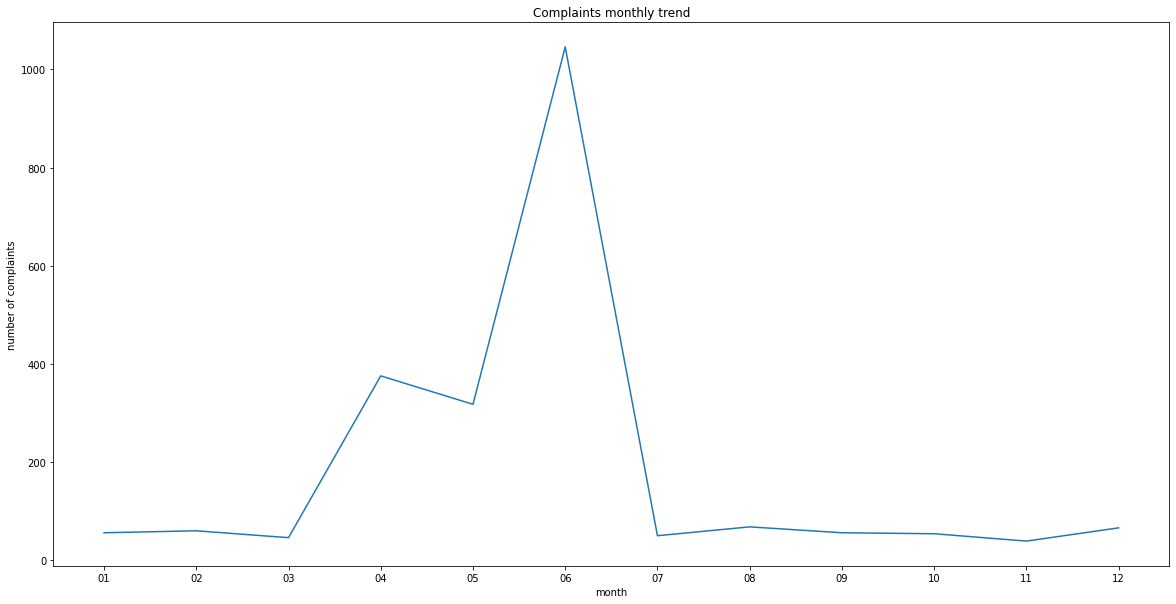

In [40]:
# to plot the graph
grouped_by_month.plot(x="lab", y="val", kind="line", figsize=(20, 10))
month_plot = plt.title('Complaints monthly trend')
plt.xlabel("month")
plt.ylabel("number of complaints")
plt.xticks(np.arange(12), grouped_by_month.index)
plt.show()

In [41]:
grouped_by_day = df.groupby(df['Date']).size()
grouped_by_day

Date
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-02-04    27
2015-02-05     7
              ..
2015-11-05    12
2015-11-06    21
2015-12-04    15
2015-12-05     7
2015-12-06    43
Length: 91, dtype: int64

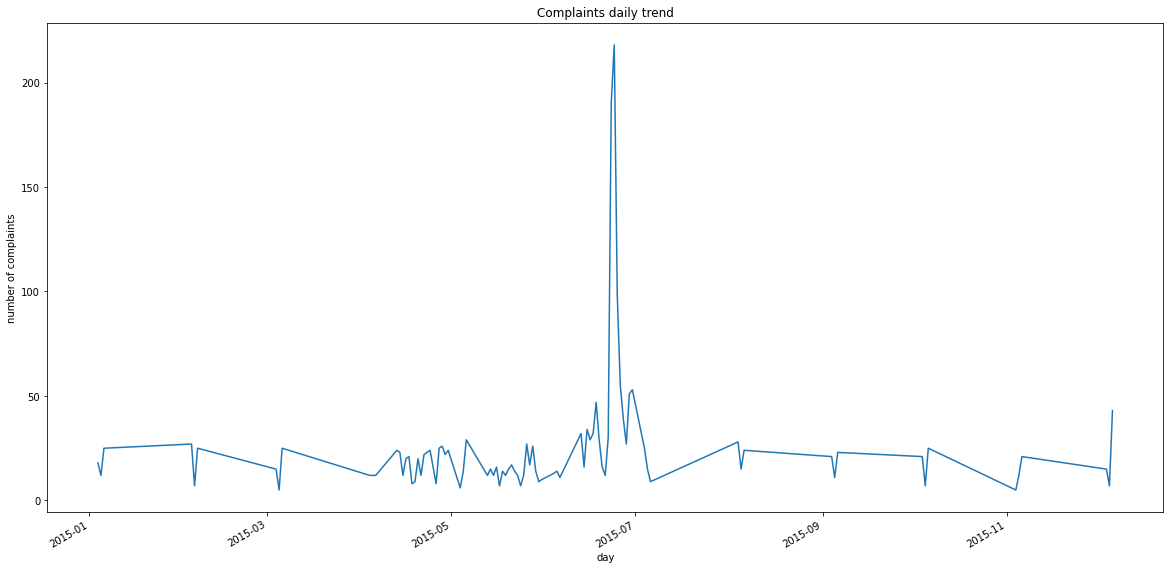

In [43]:
# to plot the graph
grouped_by_day.plot(x="lab", y="val", kind="line", figsize=(20, 10))
month_day = plt.title('Complaints daily trend')
plt.xlabel("day")
plt.ylabel("number of complaints")

plt.show()

### Provide a table with the frequency of complaint types

In [10]:
def set_complaint_type(complaint_text:str):
    complaint_text = complaint_text.lower()
    if('network' in complaint_text):
        return 'network'
    elif('internet' in complaint_text):
        return 'internet'
    else:
        return 'other'

df['complaint_type'] = df['Customer Complaint'].apply(set_complaint_type)
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaint_type
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,internet
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,other
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,other
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,other
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,other


In [11]:
grouped_by_type = df.groupby('complaint_type').size()
grouped_by_type

complaint_type
internet     532
network        2
other       1690
dtype: int64

most complaints are in the 'other' catagory

### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [12]:
def set_complaint_status(current_status:str):
    if( current_status == 'Closed' or current_status == 'Solved'):
        return "Closed"
    else:
        return "Open"

In [13]:
df['modified_status'] = df.Status.apply(set_complaint_status)

In [14]:
df.shape

(2224, 13)

In [15]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaint_type,modified_status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,internet,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,other,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,other,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,other,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,other,Closed


### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3

In [16]:
grouped_by_status = df.groupby('modified_status').size()

In [17]:
grouped_by_status

modified_status
Closed    1707
Open       517
dtype: int64

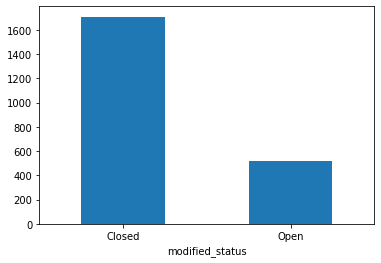

In [18]:
ax = grouped_by_status.plot.bar(x='lab', y='val', rot=0)

In [19]:
grouped_by_state = df.groupby(['State', 'modified_status']).size().unstack().fillna(0)

In [20]:
grouped_by_state

modified_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


Text(0.5, 1.0, 'Complaints status for every state')

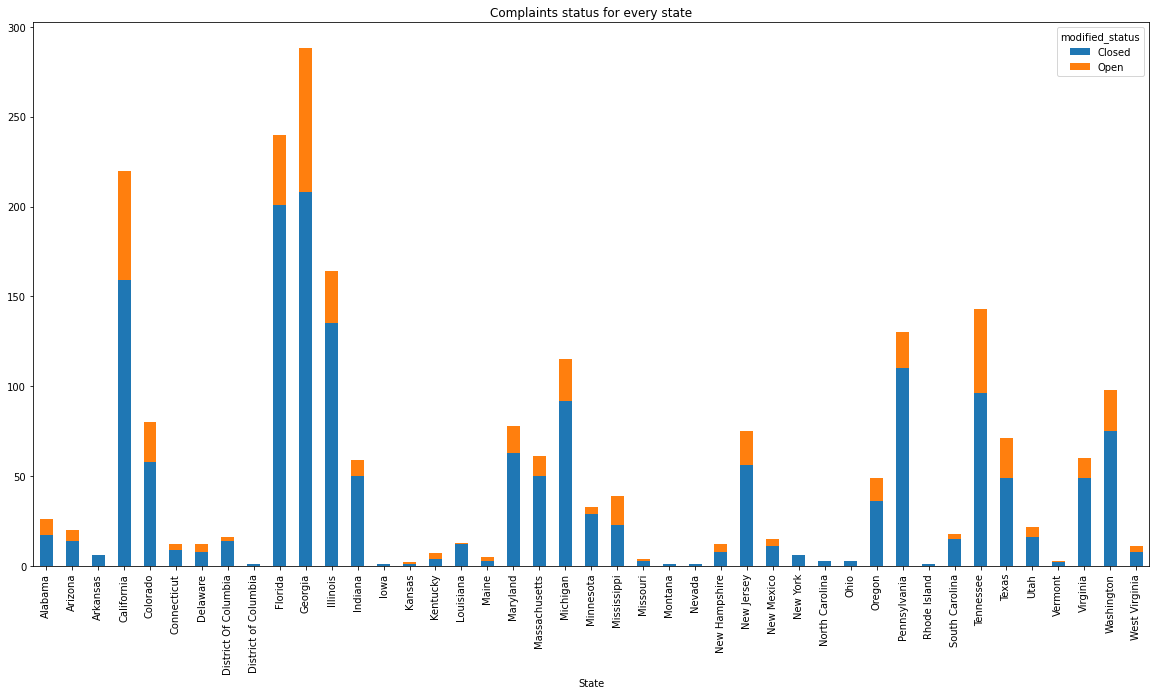

In [21]:
grouped_by_state.plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title('Complaints status for every state')


#### Q: Which state has the maximum complaints
A: From the stacked bar chart we can see that the state of Georgia has the maximum number of complaints

#### Q: Which state has the highest percentage of unresolved complaints


In [22]:
grouped_by_state['unresolved_perc']= (grouped_by_state['Open']/(grouped_by_state['Open'] + grouped_by_state['Closed'])) * 100

In [23]:
grouped_by_state.head()

modified_status,Closed,Open,unresolved_perc
State,,,
Alabama,17.0,9.0,34.615385
Arizona,14.0,6.0,30.000000
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,27.727273
Colorado,58.0,22.0,27.500000


In [24]:
grouped_by_state['unresolved_perc'].idxmax()

'Kansas'

A: As the previous step shows *Kansas* is the state which has the highest percentage of unresolved-to-resolved complaints ratio (50%). As for the states that has the heighest number of unresolved complaints among all states the figure shows that it's also the state of Georgia

#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [25]:
pd.unique(df['Received Via'])


array(['Customer Care Call', 'Internet'], dtype=object)

In [26]:
grouped_by_recieved = df.groupby(['Received Via', 'modified_status']).size().unstack().fillna(0)

In [27]:
grouped_by_recieved['resolved_perc']= (grouped_by_recieved['Closed']/(grouped_by_recieved['Open'] + grouped_by_recieved['Closed'])) * 100

In [28]:
grouped_by_recieved

modified_status,Closed,Open,resolved_perc
Received Via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593
